In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.manifold import TSNE

In [9]:
from scipy.stats import zscore

In [4]:
import matplotlib.pyplot as plt

In [7]:
labels = pd.read_csv("../07_Feature_Preprocessing/label_data_complete.txt",
                     sep="\t", decimal=',').set_index("Subject_ID")

feats = pd.read_csv(
    "../06_Feature Extraction/finalDF_56_4_SAME_SAME_SAME_.txt"
    , sep="\t"
).set_index("Subject_ID")
feats.index = map(lambda x: x[:-1] ,feats.index)
feats= feats[feats.columns[:-1]]

feats = feats.sort_index()

joinedDF = feats.join(labels,how="inner")


In [85]:
feats.shape

(97, 83)

In [10]:
joinedDF[feats.columns] = joinedDF[feats.columns].apply(zscore)

In [120]:
# INterpretation: https://distill.pub/2016/misread-tsne/

# PCA TSNE


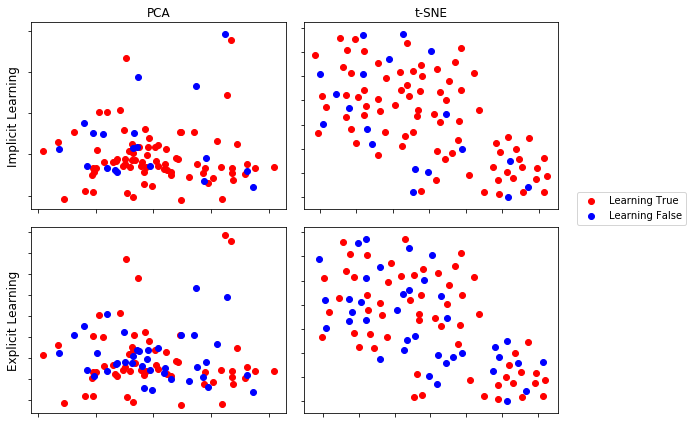

In [82]:
n_components = 2
(fig, subplots) = plt.subplots(2, 2, figsize=(8,6))
kernel = "linear"
perplexity = 10

cols = ["PCA", "t-SNE"]
rows = ["Implicit Learning", "Explicit Learning"]


for ax, col in zip(subplots[0], cols):
    ax.set_title(col)

for ax, row in zip(subplots[:,0], rows):
    ax.set_ylabel(row,size='large')



implTRUE = joinedDF.ImplizitesLernen_dich == 1
implFALSE = joinedDF.ImplizitesLernen_dich == 0

explTRUE = joinedDF.ExplizitesLernen_dich == 1
explFALSE = joinedDF.ExplizitesLernen_dich == 0


# links oben PC_impl
ax1 = subplots[0][0]
kpca = PCA(n_components=2)
Y = kpca.fit_transform(joinedDF[feats.columns])
# print("Implicit Learning, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
#ax.set_title("Explicit Learning, Kernel=%s" % kernel)
ax1.scatter(Y[implTRUE, 0], Y[implTRUE, 1], c="r")
ax1.scatter(Y[implFALSE, 0], Y[implFALSE, 1], c="b")

ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.axis('tight')


# links unten PC_expl
ax1 = subplots[1][0]

# print("Implicit Learning, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
#ax.set_title("Explicit Learning, Kernel=%s" % kernel)
ax1.scatter(Y[explTRUE, 0], Y[explTRUE, 1], c="r")
ax1.scatter(Y[explFALSE, 0], Y[explFALSE, 1], c="b")

ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.axis('tight')


#rechts oben
ax = subplots[0][1]

tsne = TSNE(2, init='random',
                     random_state=0, perplexity=perplexity)
Y = tsne.fit_transform(joinedDF[feats.columns])
t1 = time()
# print("Implicit Learning, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

ax.scatter( Y[implTRUE, 0], Y[implTRUE, 1], c="r")
ax.scatter(Y[implFALSE, 0], Y[implFALSE, 1], c="b")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')


# rechts unten

ax = subplots[1][1]

ax.scatter( Y[explTRUE, 0], Y[explTRUE, 1], c="r",label="Learning True")
ax.scatter(Y[explFALSE, 0], Y[explFALSE, 1], c="b",label="Learning False")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')


handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='center right',bbox_to_anchor=(1.2, +0.5))

fig.tight_layout()

In [91]:
compweights = pd.DataFrame(kpca.components_.transpose(),columns=["PCA1","PCA2"],index=feats.columns)

In [93]:
compweights.sort_values("PCA1")

PCA1      PCA2
RT_mean_of_std_12        -0.218808 -0.024013
PCA_of_FFTfreq_alldata_1 -0.217576 -0.031805
RT_std                   -0.216450  0.033163
RT_mean_of_IQA_12        -0.210175  0.015954
RT_IQA                   -0.187217  0.097348
RT_gini                  -0.180943 -0.120078
block2_freqband_2        -0.177955 -0.004630
RT_mean_of_Gini_12       -0.176530 -0.144842
freqband_alldata_5       -0.175857  0.012859
freqband_alldata_4       -0.168128  0.014199
freqband_alldata_6       -0.167081 -0.056672
freqband_alldata_3       -0.163887  0.082826
freqband_alldata_7       -0.158293 -0.096137
freqband_alldata_9       -0.157915 -0.103554
block1_freqband_2        -0.155521 -0.067888
block1_freqband_1        -0.155370  0.033536
RT_std_of_IQA_12         -0.155284  0.037792
freqband_alldata_8       -0.153097 -0.102007
block2_freqband_3        -0.152290 -0.084766
freqband_alldata_2       -0.151951  0.088775
block3_freqband_2        -0.150658 -0.008833
block1_freqband_3        -0.144977 -0.132800
block3_freqband_1        -0.143618  0.088490
freqband_alldata_10      -0.138452 -0.111452
block2_freqband_1        -0.137559  0.089387
block4_freqband_2        -0.126458 -0.031222
block3_freqband_3        -0.126277 -0.072109
block4_freqband_1        -0.121410  0.102140
block4_freqband_3        -0.117649 -0.083322
freqband_alldata_1       -0.103458  0.174907
...                            ...       ...
block1_PC5_60erBloecke   -0.010390 -0.015397
block3_PC3_60erBloecke   -0.009627 -0.050623
PCA_of_FFTfreq_alldata_3 -0.007531  0.036731
Korrekt_prop             -0.006712  0.117646
block4_PC2_60erBloecke    0.000787  0.160008
PCA_of_FFTfreq_alldata_5  0.001893  0.024681
block3_PC4_60erBloecke    0.002295  0.036995
block2_PC5_60erBloecke    0.002367  0.021361
block3_PC5_60erBloecke    0.003294 -0.021080
PCA_of_FFTfreq_alldata_4  0.005950  0.003926
RT_mean_tradPES           0.009291  0.080728
RT_mean_robustPES         0.009832  0.051928
block2_PC2_60erBloecke    0.012561  0.138862
block1_PC4_60erBloecke    0.015735  0.030174
part_autocorrelation_k1   0.015790  0.242578
PC_2_rawdata              0.026428  0.015448
RT_mean_HandSwitchCost    0.033975 -0.027632
part_autocorrelation_k4   0.037177  0.032527
slope_freqband1_60er      0.047880  0.054065
slope_freqband3_60er      0.048497  0.059855
part_autocorrelation_k2   0.051265  0.021643
RT_slope_of_IQA_12        0.053233  0.040406
slope_freqband2_60er      0.060294  0.038220
part_autocorrelation_k3   0.065453  0.016138
RT_slope_of_Gini_12       0.068373  0.035018
RT_slope_of_std_12        0.071409  0.047220
block4_PC1_60erBloecke    0.159113  0.012390
block3_PC1_60erBloecke    0.179740 -0.002382
block1_PC1_60erBloecke    0.186058  0.069540
block2_PC1_60erBloecke    0.195129  0.006833

[83 rows x 2 columns]

In [94]:
compweights.sort_values("PCA2")

PCA1      PCA2
RT_mean_of_Gini_12       -0.176530 -0.144842
block1_freqband_3        -0.144977 -0.132800
RT_slope_of_median_12    -0.018048 -0.126408
RT_slope                 -0.018889 -0.123212
RT_gini                  -0.180943 -0.120078
freqband_alldata_10      -0.138452 -0.111452
freqband_alldata_9       -0.157915 -0.103554
freqband_alldata_8       -0.153097 -0.102007
freqband_alldata_7       -0.158293 -0.096137
block2_freqband_3        -0.152290 -0.084766
block4_freqband_3        -0.117649 -0.083322
block3_freqband_3        -0.126277 -0.072109
block2_PC3_60erBloecke   -0.042203 -0.070966
block1_freqband_2        -0.155521 -0.067888
RT_std_of_Gini_12        -0.048351 -0.060675
freqband_alldata_6       -0.167081 -0.056672
block3_PC3_60erBloecke   -0.009627 -0.050623
block4_PC3_60erBloecke   -0.014775 -0.035152
PCA_of_FFTfreq_alldata_1 -0.217576 -0.031805
block4_freqband_2        -0.126458 -0.031222
RT_mean_HandSwitchCost    0.033975 -0.027632
RT_mean_of_std_12        -0.218808 -0.024013
RT_std_of_std_12         -0.037008 -0.023864
block1_PC3_60erBloecke   -0.014309 -0.021231
block3_PC5_60erBloecke    0.003294 -0.021080
block1_PC5_60erBloecke   -0.010390 -0.015397
block4_PC5_60erBloecke   -0.013140 -0.014128
PC_3_rawdata             -0.014629 -0.011620
block3_freqband_2        -0.150658 -0.008833
block2_freqband_2        -0.177955 -0.004630
...                            ...       ...
RT_slope_of_IQA_12        0.053233  0.040406
RT_slope_of_std_12        0.071409  0.047220
RT_mean_robustPES         0.009832  0.051928
slope_freqband1_60er      0.047880  0.054065
slope_freqband3_60er      0.048497  0.059855
block1_PC1_60erBloecke    0.186058  0.069540
RT_mean_tradPES           0.009291  0.080728
freqband_alldata_3       -0.163887  0.082826
block3_freqband_1        -0.143618  0.088490
freqband_alldata_2       -0.151951  0.088775
block2_freqband_1        -0.137559  0.089387
RT_IQA                   -0.187217  0.097348
block4_freqband_1        -0.121410  0.102140
block3_PC2_60erBloecke   -0.031425  0.114099
Korrekt_prop             -0.006712  0.117646
block2_PC2_60erBloecke    0.012561  0.138862
block1_PC2_60erBloecke   -0.022559  0.139490
block4_PC2_60erBloecke    0.000787  0.160008
freqband_alldata_1       -0.103458  0.174907
PCA_of_FFTfreq_alldata_2 -0.026947  0.197611
RT_std_of_median_12      -0.095209  0.207929
RT_Q3                    -0.084652  0.235735
RT_propExtreme           -0.040366  0.237605
part_autocorrelation_k1   0.015790  0.242578
RT_mean                  -0.056505  0.244847
RT_intercept             -0.042621  0.245163
PC_1_rawdata             -0.055200  0.245550
RT_median                -0.048951  0.246147
RT_mean_of_median_12     -0.050180  0.246541
RT_Q1                    -0.010756  0.249846

[83 rows x 2 columns]